# Problem Statement

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Attribute Information: 

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore')

In [23]:
df  = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
df.shape

(8760, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [26]:
print (df.isna().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<AxesSubplot:xlabel='Seasons', ylabel='count'>

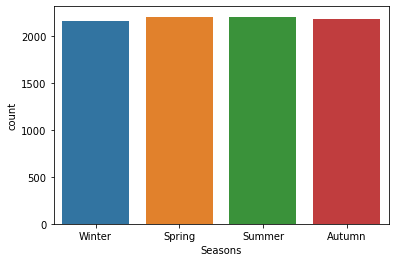

In [27]:
sns.countplot(x="Seasons",data=df)

<AxesSubplot:xlabel='Holiday', ylabel='count'>

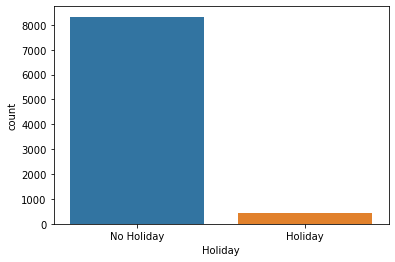

In [28]:
sns.countplot(x="Holiday", data=df)

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

Extracting new columns (day of the week, day of the month, hour, month, season, year etc.) by using new index.

In [30]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


<AxesSubplot:xlabel='Year', ylabel='count'>

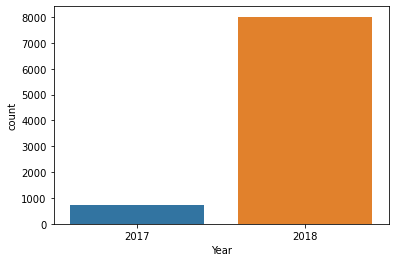

In [31]:
sns.countplot(x="Year", data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

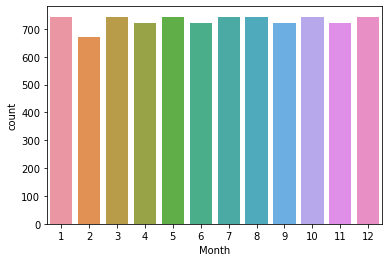

In [32]:
sns.countplot(x="Month", data=df)

Plotting bike shares by months and year_of_month to understand the correlation between bike shares and months.

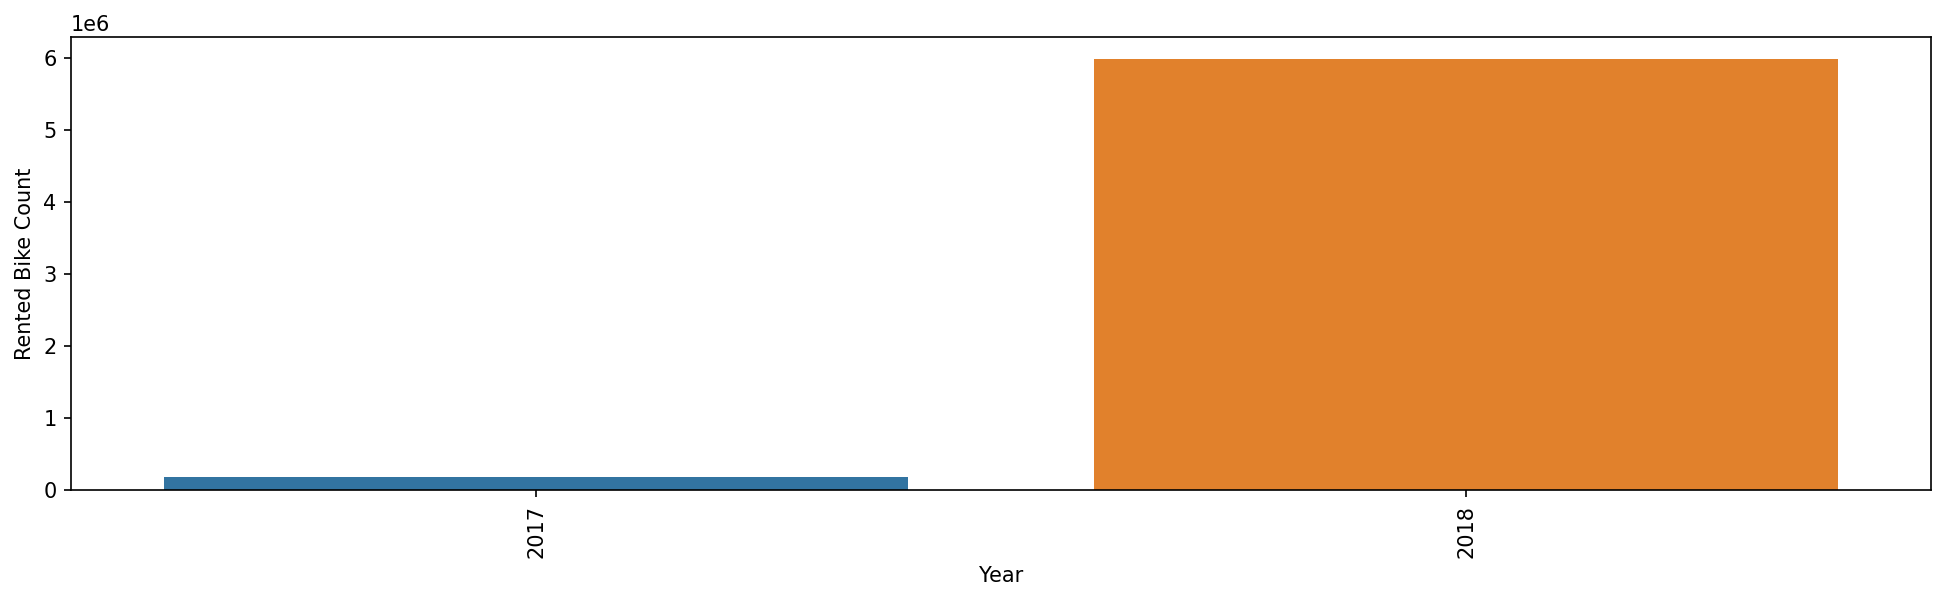

In [33]:
Years = df.groupby("Year").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Year", y="Rented Bike Count", data=Years)
plt.xticks(rotation=90);

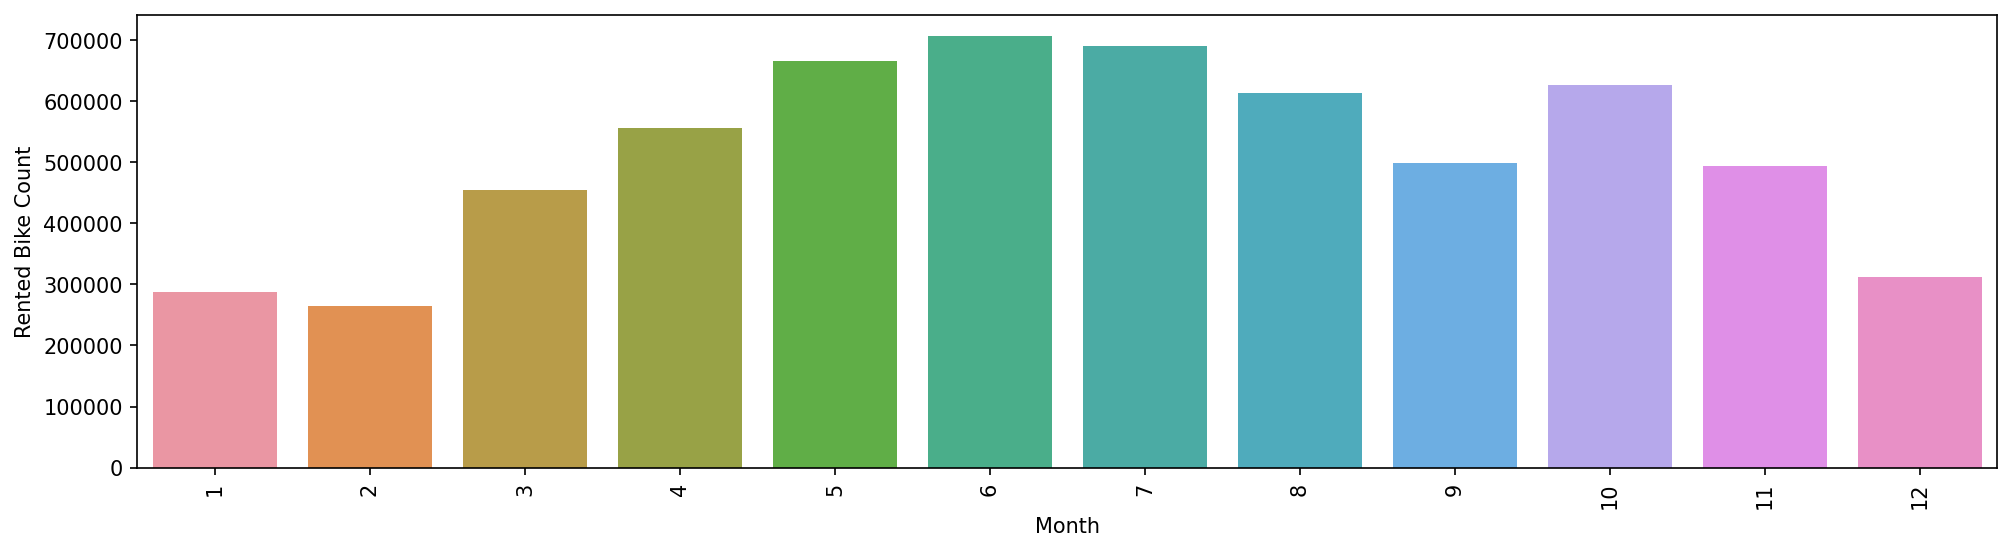

In [34]:
Month = df.groupby("Month").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

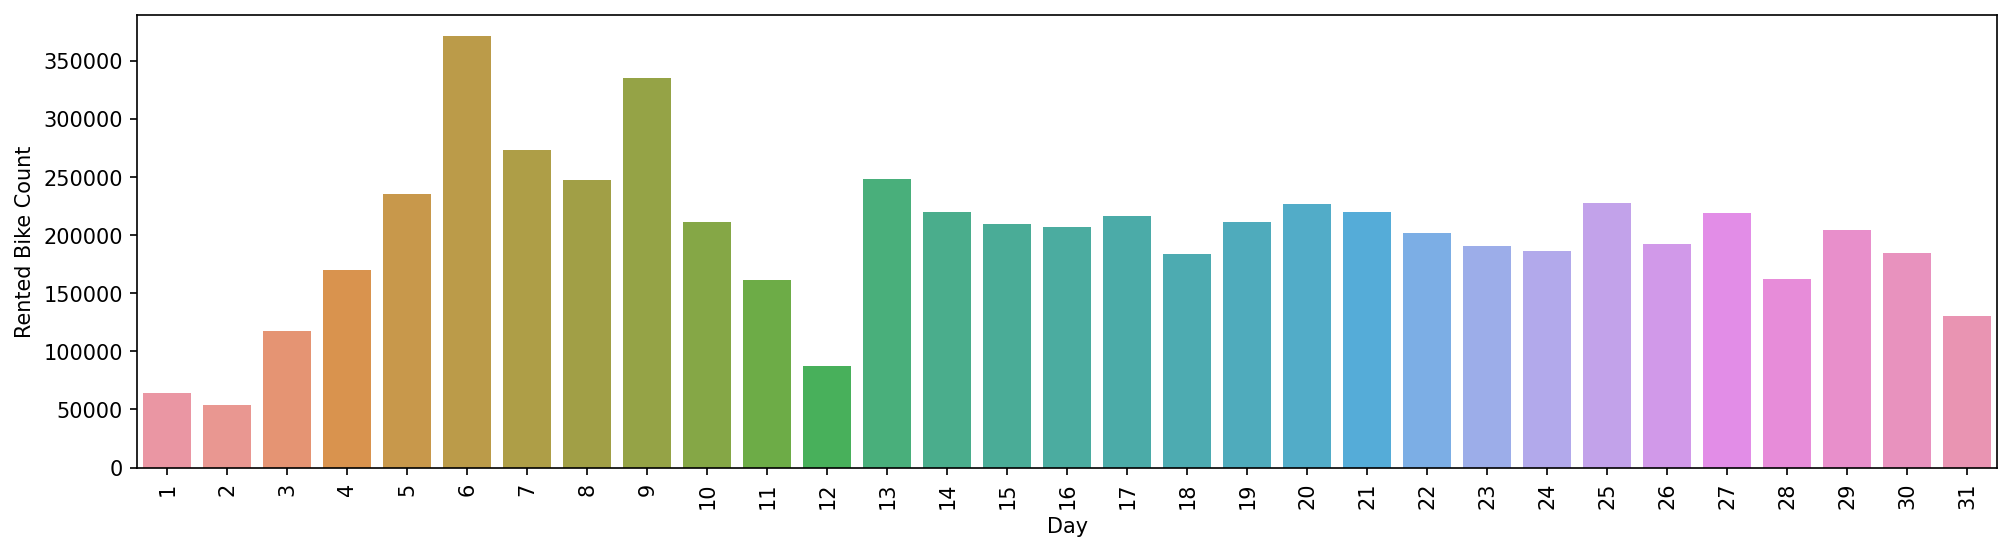

In [35]:
Day = df.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

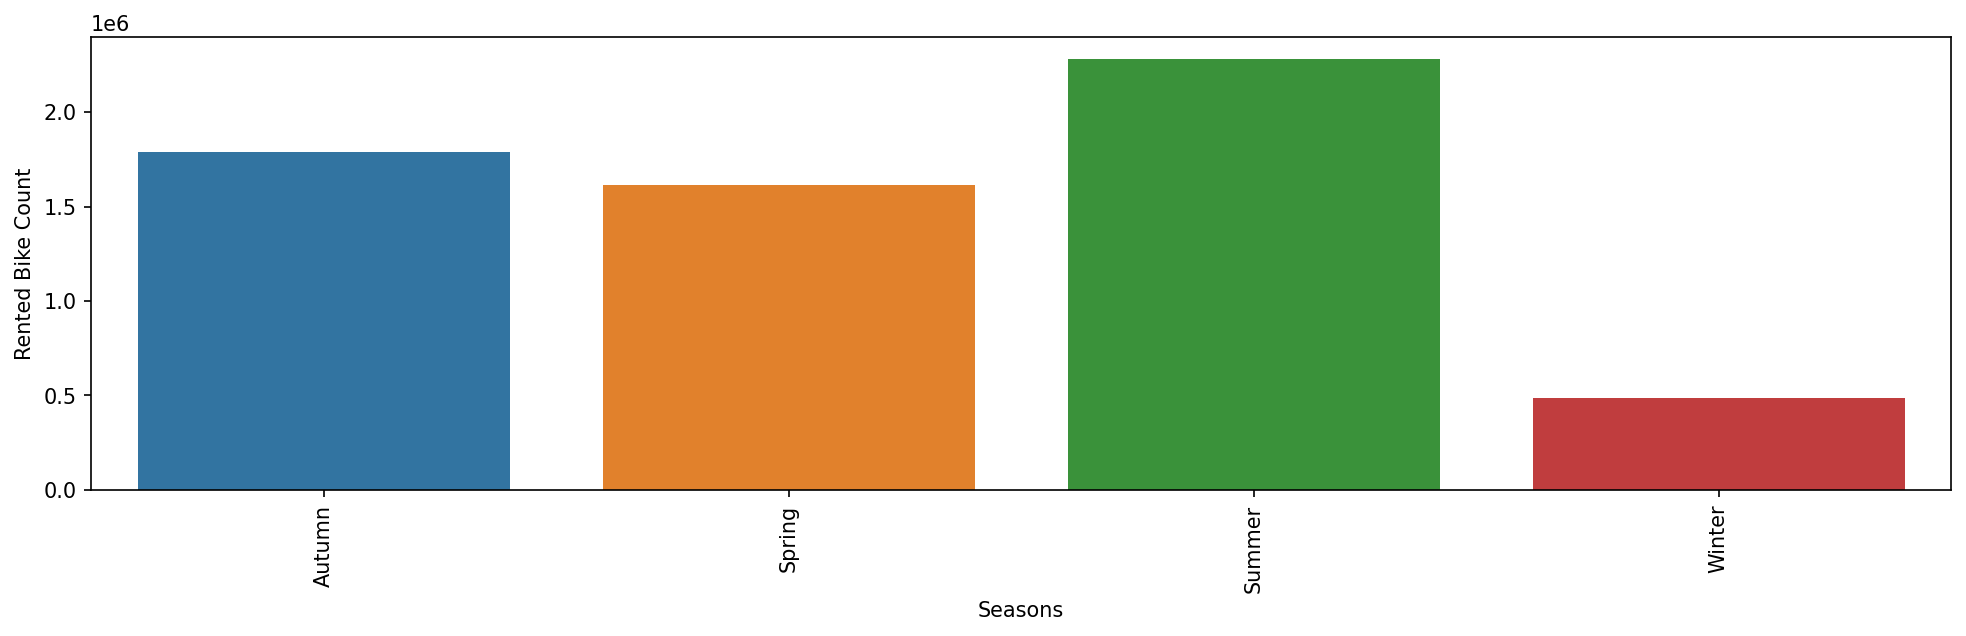

In [36]:
Season = df.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

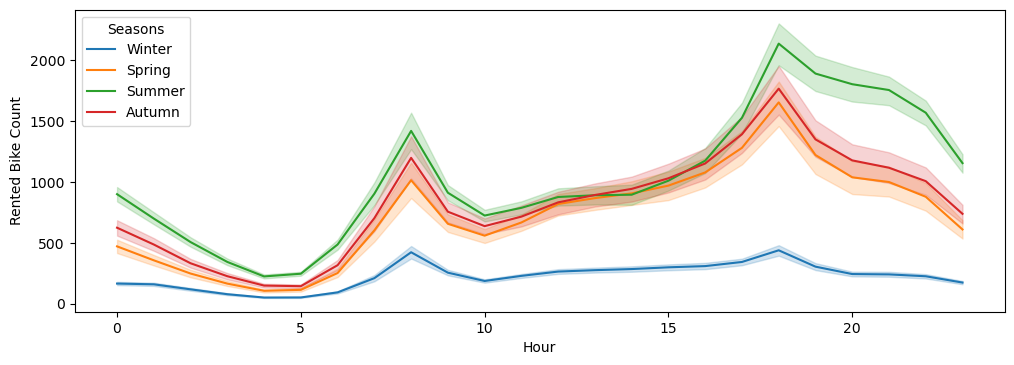

In [37]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")

<AxesSubplot:>

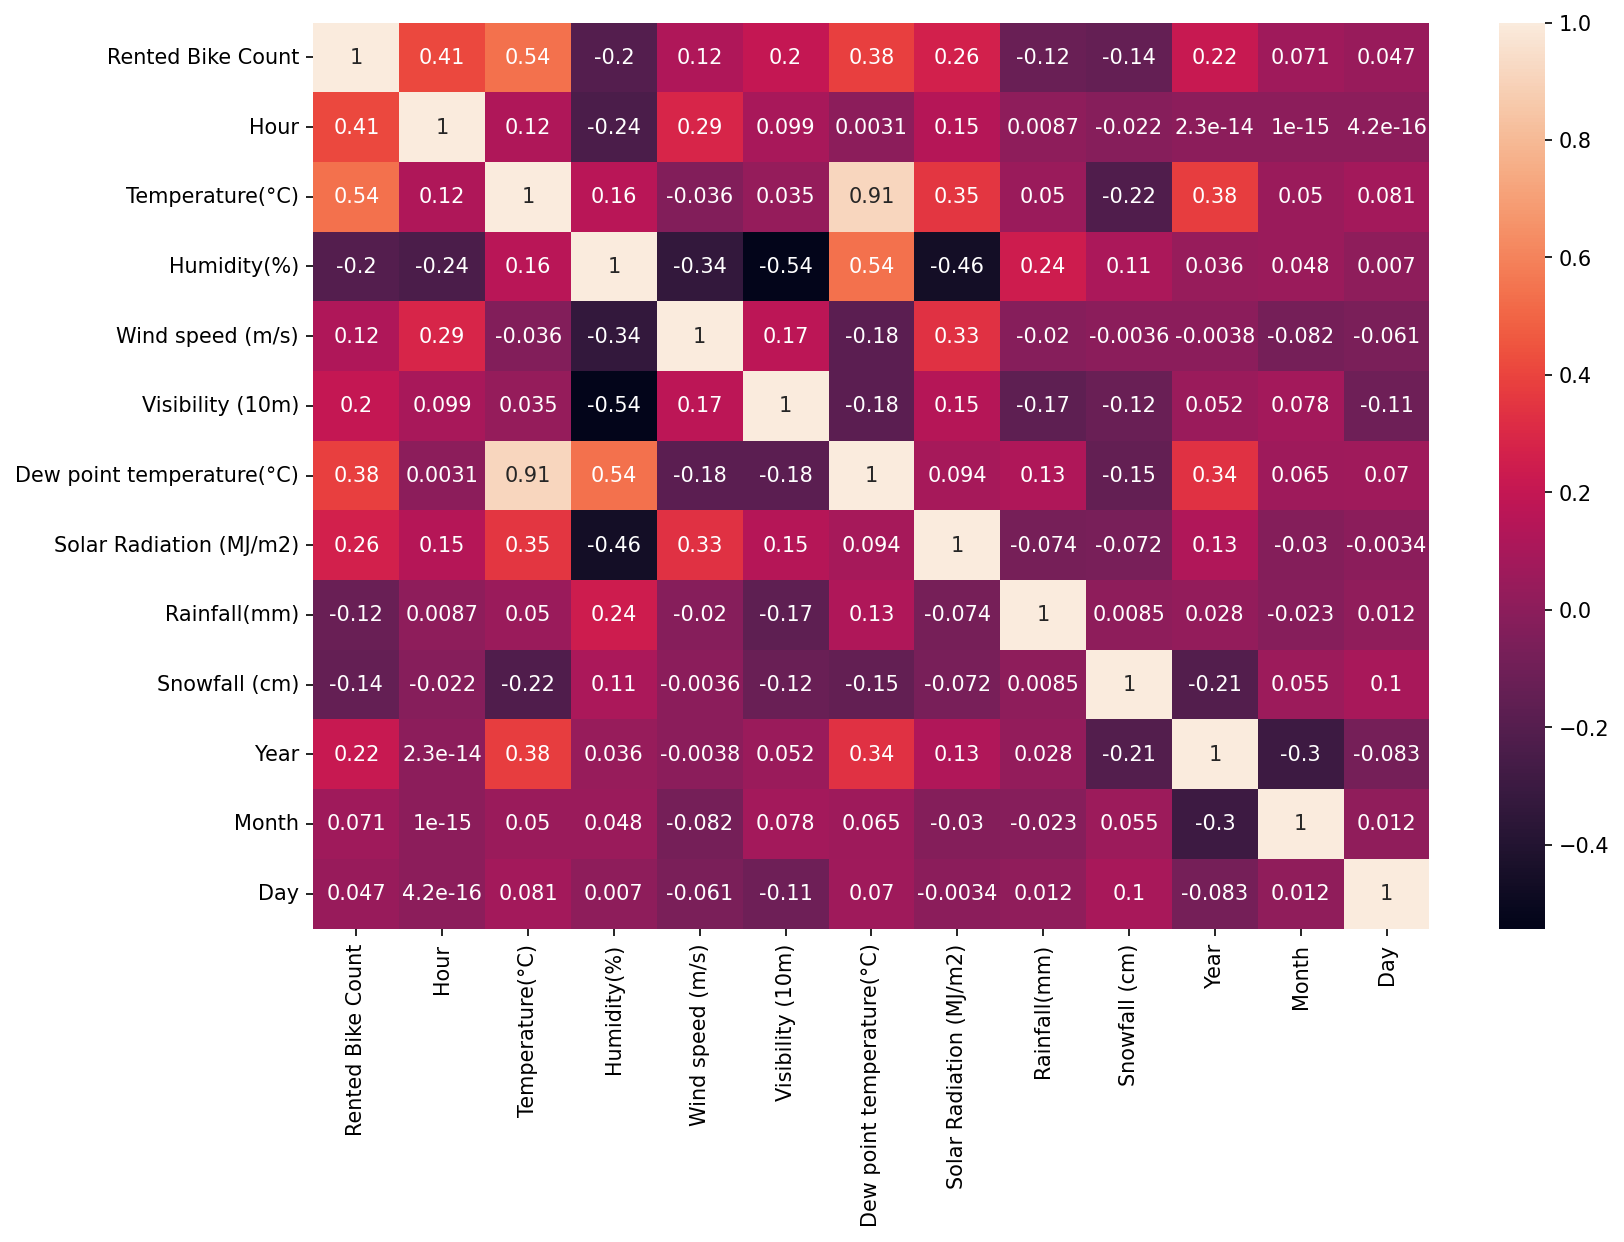

In [38]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

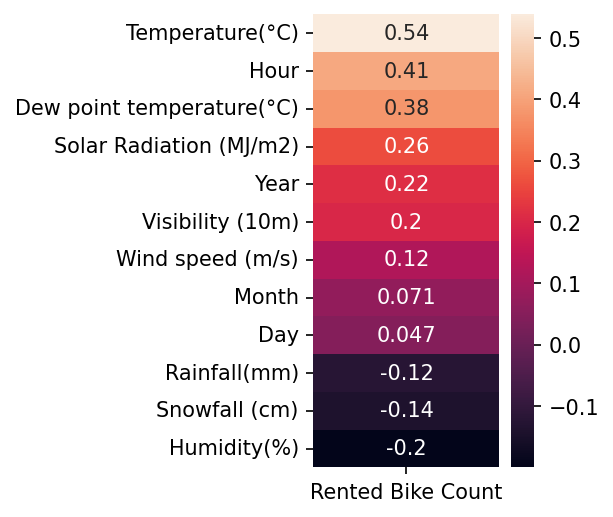

In [39]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

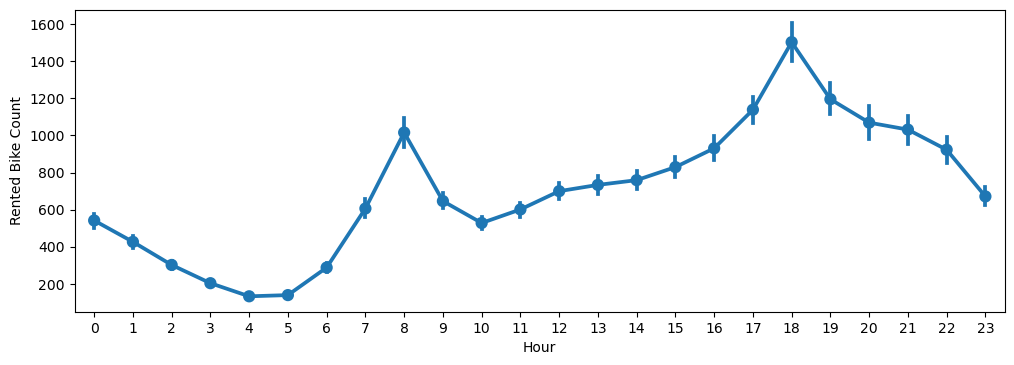

In [41]:
plt.figure(figsize=(12,4), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count")

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

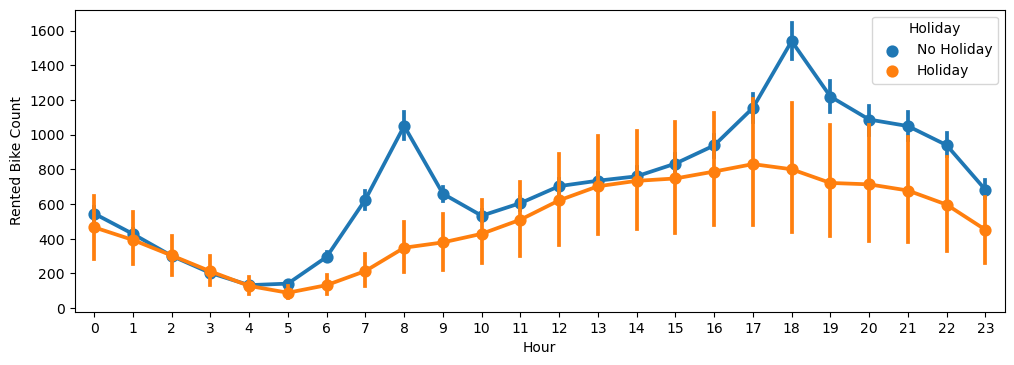

In [43]:
plt.figure(figsize=(12,4), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", 
              hue="Holiday")

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

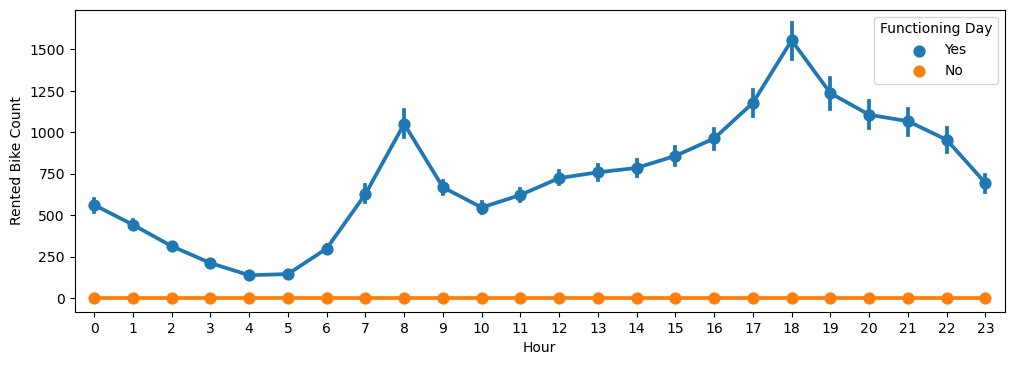

In [45]:
plt.figure(figsize=(12,4), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", 
              hue="Functioning Day")

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

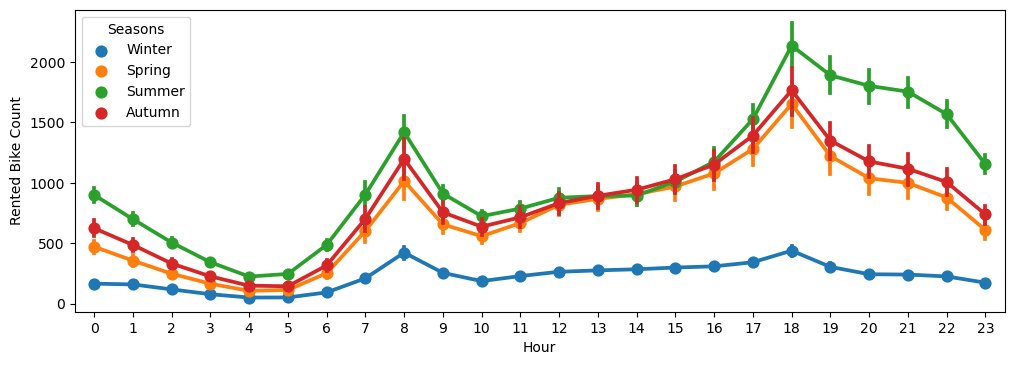

In [46]:
plt.figure(figsize=(12,4), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", 
              hue="Seasons")